# Homework 03

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [14]:
# Checking how many samples we have
len(X_train)

60000

In [15]:
# Each element is matrix 28*28
X_train[0].shape

(28, 28)

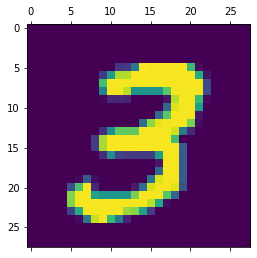

In [16]:
plt.matshow(X_train[7])

In [18]:
# Displaying the first 5 labels
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [25]:
# Scaling is a technique that improves the accuracy of a machine learning model.
# So let's do sooo.
X_train = X_train / 255
X_test = X_test / 255

In [26]:
# Flattening the images (from a two dimensional array to a single dimensional array).
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

### Let's build a very simple NN

In [27]:
# The input layer contains 784, and the output layer contains 10 neurons.
# The index of the activated neuron is our prediction.
# We chose the sigmoid activation.
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

In [28]:
# In order to define the weights, we need to compile our model!
# For the loss function It's the sparse categorical cross entropy, because our output is
# an Integer (sparse) and it's indeed categorical.
# My goal is to make it more accurate.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
# Epochs is the number of times your model will go through the data.
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4665 - accuracy: 0.8785
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3041 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2840 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2733 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2667 - accuracy: 0.9256


In [30]:
# The accuracy that we've got above is depending on the training set.
# Let's see the accuracy on the test set.
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1000us/step - loss: 0.2702 - accuracy: 0.9256


[0.2701945900917053, 0.925599992275238]

In [31]:
# Let's see how the model is predicting on the test set.
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.7469337e-02, 4.6283529e-07, 4.9408376e-02, 9.5409417e-01,
       3.3202767e-03, 1.0351801e-01, 1.7119103e-06, 9.9985182e-01,
       1.2811065e-01, 6.1631435e-01], dtype=float32)

In [32]:
np.argmax(y_predicted[0])

7

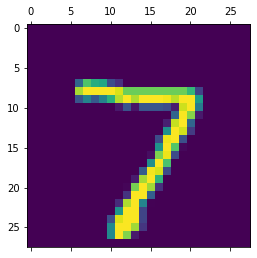

In [33]:
plt.matshow(X_test[0])

In [34]:
# Generating the predicted labels
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [35]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    0,    2,    0,    4,    5,    2,    4,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   6,    8,  924,   17,    7,    3,   13,   11,   41,    2],
       [   4,    0,   17,  928,    0,   16,    2,   11,   25,    7],
       [   2,    1,    2,    1,  917,    0,   11,    4,   10,   34],
       [  11,    3,    3,   45,    7,  749,   16,    8,   43,    7],
       [  13,    3,    6,    1,    7,    9,  913,    2,    4,    0],
       [   1,    6,   24,    6,    7,    0,    0,  957,    2,   25],
       [   5,    6,    6,   19,    8,   17,   10,   11,  885,    7],
       [  10,    7,    1,   10,   29,    5,    0,   25,   14,  908]])>

Text(69.0, 0.5, 'Truth')

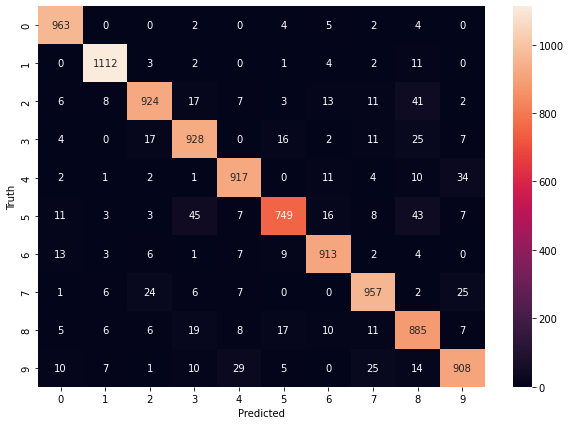

In [36]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

* The elements in orange are right predictions (on diagonal) , for example, 963 times the model predicted 0 while it was true.
* The elements in dark blue are errors, for example, 45 times our model predicted 3 while it was 5.

## Let's add a hidden layer

In [37]:
# There's no rule of thumb to specify the number of the hidden layer, we will try and adjust!
# ReLu activation function: will output the input directly if it is positive, otherwise, it will output zero.
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2789 - accuracy: 0.9199
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1292 - accuracy: 0.9606: 0s - loss: 0.1305 
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0891 - accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0672 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0530 - accuracy: 0.9836


In [38]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0850 - accuracy: 0.9733


[0.0849808007478714, 0.9732999801635742]

* We can clearly see that our accuracy improved by adding a hidden layer.

Text(69.0, 0.5, 'Truth')

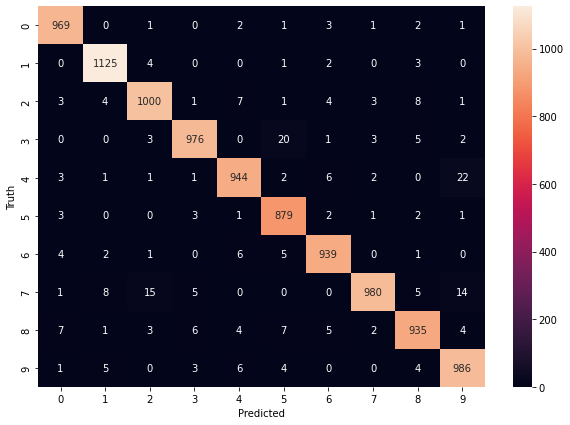

In [39]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Let's try to use the Flatten Layer

In [40]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2693 - accuracy: 0.9240
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1235 - accuracy: 0.9638
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0865 - accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0662 - accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0537 - accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0426 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0351 - accuracy: 0.9890
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0285 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0234 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.020

In [41]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0811 - accuracy: 0.9781


[0.08113706856966019, 0.9781000018119812]